In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import sys, os
sys.path.append('../../src/')
# import toolbox
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from toolbox import *
import pickle
# from toolbox import *

In [3]:
spot_name = 'rs'
future_name = 'rf'

spotCoin = 'btc'

data_name = '%sUSD_BTCUSD_25SEP20'%spotCoin.upper()
OHR_path = 'best_h/%s/'%data_name
data_path = '/Volumes/external_SSD/copulaData/Deribit_ready2/%s/'%data_name
HEs = pd.read_csv('%s_HEs.csv'%spotCoin, index_col=0)

In [5]:
HEs

,copula,risk_measure,h,file,HE,likelihood,AIC,AIC_selected
0,Clayton,ES q=0.05,0.861523,44.csv,0.681988,-1099.936944,2201.873888,0
1,Clayton,ERM k=10,0.886719,120.csv,0.713524,-536.890479,1075.780958,0
2,Clayton,ES q=0.05,0.814648,170.csv,0.640979,-2048.659779,4099.319559,0
3,Clayton,VaR q=0.05,0.956641,78.csv,0.648490,-2089.471028,4180.942055,0
4,Clayton,VaR q=0.01,0.905371,104.csv,0.710298,-3328.099620,6658.199240,0
...,...,...,...,...,...,...,...,...
10039,t_Copula,ES q=0.05,0.892090,8.csv,0.677228,376.893702,-749.787403,0
10040,t_Copula,VaR q=0.01,0.842480,160.csv,0.643631,374.867522,-745.735043,1
10041,t_Copula,VaR q=0.01,0.798730,69.csv,0.662439,343.353612,-682.707224,1
10042,t_Copula,Variance,0.900000,115.csv,0.928641,368.408038,-732.816076,1


In [108]:
copula_names = list(set(HEs.copula))
risk_measures = list(set(HEs.risk_measure))
files = list(set(HEs.file))

In [109]:
rh_results = []

for f in files:
    print(f)
    ######## WORKING WITH TEST DATA ########
    test = pd.read_csv(data_path+'test/'+f, index_col=0) 
    rs = test.rs
    rf = test.rf
    time = pd.to_datetime(test.datetime)
    for c in copula_names:
        for rm in risk_measures:
            _id = HEs.copula == c
            _id &= HEs.risk_measure == rm
            _id &= HEs.file == f
            h  = HEs.loc[_id, 'h'].values[0]
            AIC_selected = HEs.loc[_id, 'AIC_selected'].values[0]
            rh = rs - h*rf
            rh_results.append({'c':c, 'rm':rm, 'f':f, 'h':h,
                               'rs':rs, 'rf':rf, 'rh':rh,
                               'datetime':time, 'AIC_selected':AIC_selected})

89.csv
119.csv
29.csv
45.csv
97.csv
73.csv
76.csv
145.csv
110.csv
134.csv
106.csv
94.csv
61.csv
33.csv
148.csv
24.csv
31.csv
178.csv
107.csv
44.csv
34.csv
102.csv
123.csv
21.csv
92.csv
42.csv
81.csv
125.csv
120.csv
141.csv
90.csv
103.csv
130.csv
4.csv
64.csv
75.csv
180.csv
69.csv
151.csv
3.csv
55.csv
156.csv
144.csv
26.csv
109.csv
182.csv
142.csv
165.csv
82.csv
157.csv
5.csv
143.csv
126.csv
138.csv
116.csv
57.csv
30.csv
177.csv
46.csv
91.csv
160.csv
93.csv
80.csv
51.csv
37.csv
27.csv
155.csv
41.csv
137.csv
159.csv
163.csv
28.csv
154.csv
117.csv
47.csv
96.csv
172.csv
150.csv
86.csv
87.csv
50.csv
128.csv
140.csv
72.csv
13.csv
25.csv
23.csv
167.csv
79.csv
38.csv
115.csv
114.csv
22.csv
78.csv
162.csv
113.csv
36.csv
153.csv
127.csv
19.csv
100.csv
11.csv
10.csv
169.csv
7.csv
124.csv
43.csv
12.csv
158.csv
98.csv
56.csv
164.csv
58.csv
173.csv
59.csv
105.csv
9.csv
152.csv
112.csv
161.csv
95.csv
183.csv
122.csv
147.csv
121.csv
175.csv
171.csv
74.csv
71.csv
179.csv
0.csv
111.csv
17.csv
118.csv
84

In [111]:
rh_results_df = []

for row in rh_results:
    _df = pd.DataFrame(row['rs'])
    _df.columns = ['rs']
    _df.loc[:, 'rf'] = row['rf']
    _df.loc[:, 'rh'] = row['rh']
    _df.loc[:, 'h'] = row['h']
    _df.loc[:, 'risk_measure'] = row['rm']
    _df.loc[:, 'datetime'] = row['datetime']
    _df.loc[:, 'copula'] = row['c']
    _df.loc[:, 'file'] = row['f']
    _df.loc[:, 'AIC_selected'] = row['AIC_selected']
    rh_results_df.append(_df)
    
rh_results_df = pd.concat(rh_results_df)

In [112]:
_id = rh_results_df.AIC_selected == 1
_id &= rh_results_df.risk_measure == 'Variance'
_df = rh_results_df.loc[_id, :].sort_values('datetime').reset_index(drop=True)

In [113]:
rh_results_df.to_csv('%s_rh_results.csv'%spotCoin)

In [476]:
spotCoin = 'eth'
data_name = '%sUSD_BTCUSD_25SEP20'%spotCoin.upper()
OHR_path = 'best_h/%s/'%data_name
data_path = '/Volumes/external_SSD/copulaData/Deribit_ready2/%s/'%data_name
HEs = pd.read_csv('%s_HEs.csv'%spotCoin, index_col=0)
rh_results_df = pd.read_csv('%s_rh_results.csv'%spotCoin)

In [477]:
rh_copula_selection = rh_results_df.loc[rh_results_df.AIC_selected == 1,:]
rh_copula_selection.datetime = pd.to_datetime(rh_copula_selection.datetime)
# risk_measures_name = list(set(rh_copula_selection.risk_measure))

risk_measures_name = ['Variance', 'ES q=0.05', 'ES q=0.01', 
                      'VaR q=0.05', 'VaR q=0.01', 'ERM k=10']

rh_copula_selection.sort_values('datetime',inplace=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [478]:
# Stationary Block Bootstrap 2.7.2 of Lahiri
def SB(X, p, T, seed, return_id=True):
    np.random.seed(seed)
    # X: time series to be sampled
    # p: param of Geometric distribution; 1/p = mean of block sample length
    # T: length of pseudo time series 
    X = X.reset_index(drop=True)
    blockL = 0
    s = []
    while blockL < T:
        I = int(np.random.choice(len(X), 1, replace=True))
        L = int(np.random.geometric(p=p, size=1))
        _id = np.linspace(I, I+L-1, num=L)
        _id = list((_id % len(X)).astype(int))
        blockL += len(_id)
        if return_id:
            s+=[_id]
        else:
            s.append(X.loc[_id, :])
    
    if return_id:
        return np.concatenate(s).astype('int')[:T]
    else:
        return pd.concat(s).iloc[:T]

In [479]:
T = len(pd.read_csv(data_path+'train/1.csv', index_col=0)) # = 336
p = 1/4

In [480]:
rm = 'Variance'
_id = rh_copula_selection.risk_measure == rm   
X = rh_copula_selection.loc[_id,:].copy()

sample_id = dict()

N_samples = 500
for seed in range(0,N_samples):
    sample_id[seed] = SB(X,p,T,seed,True)

In [481]:
risk_measures_name

['Variance', 'ES q=0.05', 'ES q=0.01', 'VaR q=0.05', 'VaR q=0.01', 'ERM k=10']

In [482]:
ERM = lambda x: ERM_estimate_trapezoidal(10, x)
ES1 = lambda x: ES(0.01, x)
ES5 = lambda x: ES(0.05, x)
VaR1 = lambda x: VaR(0.01, x)
VaR5 = lambda x: VaR(0.05, x)
Variance = lambda x: np.var(x)

risk_measures_fn = [Variance, ES5, ES1, VaR5, VaR1, ERM]
risk_measures_dict = dict(zip(risk_measures_name, risk_measures_fn))

In [483]:
HE_results = dict()

for rm in risk_measures_name:
    _id = rh_copula_selection.risk_measure == rm   
    X = rh_copula_selection.loc[_id,:].copy().reset_index(drop=True)
    fn = risk_measures_dict[rm]
    
    HE_arr = []
    for seed in list(sample_id.keys()):
        _id = sample_id[seed]
        _df = X.loc[_id, ['rh','rs']]
        HE = 1-(fn(_df.rh)/fn(_df.rs))
        HE_arr.append(HE)
        
    HE_results[rm] = HE_arr

In [484]:
rm_results = dict()

for rm in risk_measures_name:
    _id = rh_copula_selection.risk_measure == rm   
    X = rh_copula_selection.loc[_id,:].copy().reset_index(drop=True)
    fn = risk_measures_dict[rm]
    
    rm_arr = []
    for seed in list(sample_id.keys()):
        _id = sample_id[seed]
        _df = X.loc[_id, ['rh','rs']]
        rm_arr.append((fn(_df.rh), fn(_df.rs)))
        
    rm_results[rm] = rm_arr

In [485]:
returns_results = dict()

for rm in risk_measures_name:
    _id = rh_copula_selection.risk_measure == rm   
    X   = rh_copula_selection.loc[_id,:].copy().reset_index(drop=True)
    fn  = risk_measures_dict[rm]
    
    returns_arr = []
    for seed in list(sample_id.keys()):
        _id = sample_id[seed]
        _df = X.loc[_id, ['rh','rs']]
        returns_arr.append((_df.rh, _df.rs))
        
    returns_results[rm] = returns_arr

In [486]:
rm = 'ES q=0.05'
_id = rh_copula_selection.risk_measure == rm   
X = rh_copula_selection.loc[_id,:].copy().reset_index(drop=True)
fn = risk_measures_dict[rm]

HE_arr = []
for seed in list(sample_id.keys()):
    _id = sample_id[seed]
    _df = X.loc[_id, ['rh','rs']]

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

0.013083652616071534 0.011058639945373351


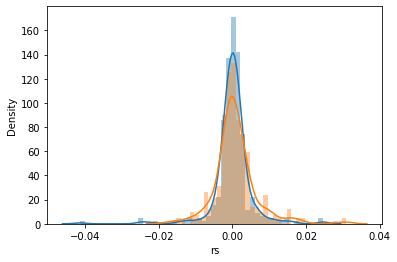

In [487]:
rm = 'ES q=0.05'
seed = 2
rh = returns_results[rm][seed][0]
rs = returns_results[rm][seed][1]

fn = risk_measures_dict[rm]

sns.distplot(rh)
sns.distplot(rs)

print(fn(rh), fn(rs))

In [488]:
seed = 2
_id = sample_id[seed]
_df = X.loc[_id, ['rh','rs']]
fn = risk_measures_dict['VaR q=0.01']
print(fn(_df.loc[:,'rh']), fn(_df.loc[:,'rs']))
print(1-fn(_df.loc[:,'rh'])/fn(_df.loc[:,'rs']))

0.0214027528426759 0.0144960433566194
-0.47645480329655965


In [489]:
fn(_df.rh)

0.0214027528426759

In [490]:
_df = pd.DataFrame(rm_results['ES q=0.01'])
_df.columns = ['rm_rh', 'rm_rs']
_df.loc[:, 'HE'] = 1-(_df.iloc[:,0]/_df.iloc[:,1])
_df

,rm_rh,rm_rs,HE
0,0.010829,0.015791,0.314281
1,0.017135,0.020689,0.171775
2,0.023320,0.015953,-0.461755
3,0.027032,0.018789,-0.438671
4,0.028033,0.019223,-0.458327
...,...,...,...
495,0.018842,0.020115,0.063303
496,0.019726,0.020041,0.015736
497,0.013063,0.018004,0.274473
498,0.024246,0.018285,-0.325983


In [491]:
_df = pd.DataFrame(rm_results['ES q=0.05'])
_df.columns = ['rm_rh', 'rm_rs']
_df.loc[:, 'HE'] = 1-(_df.iloc[:,0]/_df.iloc[:,1])
_df

,rm_rh,rm_rs,HE
0,0.007160,0.010560,0.322035
1,0.010180,0.012709,0.199005
2,0.013084,0.011059,-0.183116
3,0.016611,0.015662,-0.060582
4,0.014088,0.012865,-0.095070
...,...,...,...
495,0.011882,0.013280,0.105332
496,0.014120,0.013966,-0.011035
497,0.009011,0.013210,0.317853
498,0.016190,0.012433,-0.302167


In [492]:
with open('%s_HE_SB_results.pickle'%spotCoin, 'wb') as f:
    pickle.dump(HE_results, f)

In [493]:
spotCoin = 'btc'
with open('%s_HE_SB_results.pickle'%spotCoin, 'rb') as f:
    btc_HE = pickle.load(f)

spotCoin = 'eth'
with open('%s_HE_SB_results.pickle'%spotCoin, 'rb') as f:
    eth_HE = pickle.load(f)

In [494]:
risk_measures_name

['Variance', 'ES q=0.05', 'ES q=0.01', 'VaR q=0.05', 'VaR q=0.01', 'ERM k=10']

In [495]:
risk_measure_name_plot = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 99%', 'ERM']
rm2name =  dict(zip(risk_measures_name, risk_measure_name_plot))

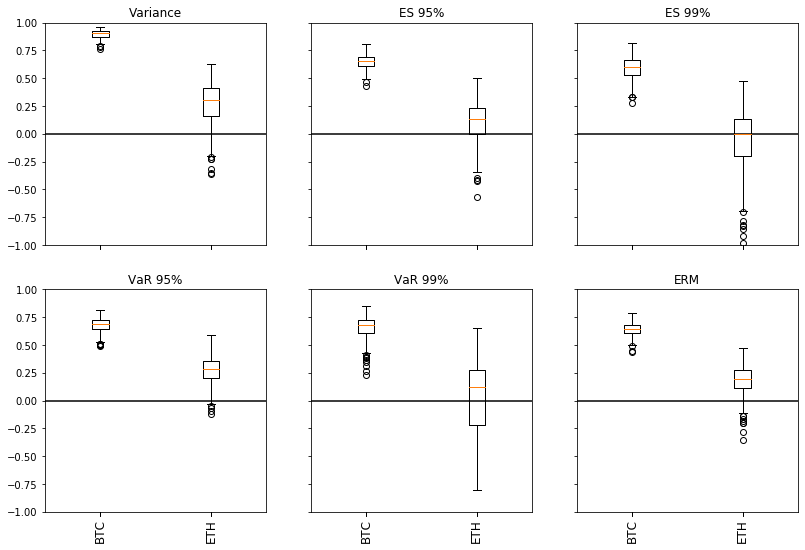

In [497]:
factor = 4.5
xsize = 3*factor
ysize = 2*factor
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

for i, rm in enumerate(risk_measures_name):
    axs.flatten()[i].boxplot([btc_HE[rm], eth_HE[rm]])
    axs.flatten()[i].axhline(y=0, xmin=0, xmax=1, color='black')
    axs.flatten()[i].set_title(rm2name[rm])

for p, a in enumerate(axs):
    xtickNames = plt.setp(axs[p], xticklabels=['BTC', 'ETH'])
    plt.setp(xtickNames, rotation=90, fontsize=12)
    
plt.ylim((-1,1))

plt.savefig('hourly_HE.png', transparent=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

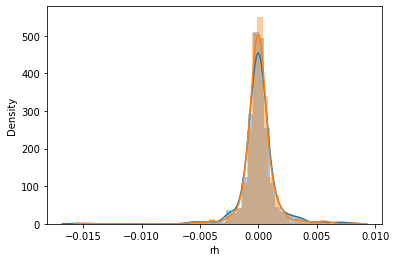

In [133]:
_id = rh_copula_selection.risk_measure == 'ES q=0.01'
sns.distplot(rh_copula_selection.loc[_id, 'rh'])

_id = rh_copula_selection.risk_measure == 'ES q=0.05'
sns.distplot(rh_copula_selection.loc[_id, 'rh'])